# Feature Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = data.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
189,28,32000,0
133,21,68000,0
60,27,20000,0
147,41,30000,0
392,45,45000,1


In [4]:
df.shape

(400, 3)

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df.drop("Purchased",axis = 1)
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y = df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
print(f"{X_train.shape}\n{x_test.shape}\n{Y_train.shape}\n{y_test.shape}")

(280, 2)
(120, 2)
(280,)
(120,)


## Standardization 

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler

StandardScaler()

In [11]:
# Fit the scaler to the train set, it will leran the parameters
scaler.fit(X_train)
scaler

StandardScaler()

In [12]:
# Transform train and test sets
# calculate Z score value for each data point
x_train_trans = scaler.transform(X_train)
x_test_trans = scaler.transform(x_test)
x_train_trans

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [13]:
# This is the same mathematical mean, but:
# It is stored internally by the scaler after fitting.
# It’s used later during transformations
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
# x_train_trans gives us output in numpy array we can display this output in dataframe format
x_train_trans = pd.DataFrame(x_train_trans,columns = X_train.columns)
x_test_trans = pd.DataFrame(x_test_trans,columns = x_test.columns)

In [15]:
x_train_trans.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [17]:
np.round(x_train_trans.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [18]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


## Effect Of Scaling

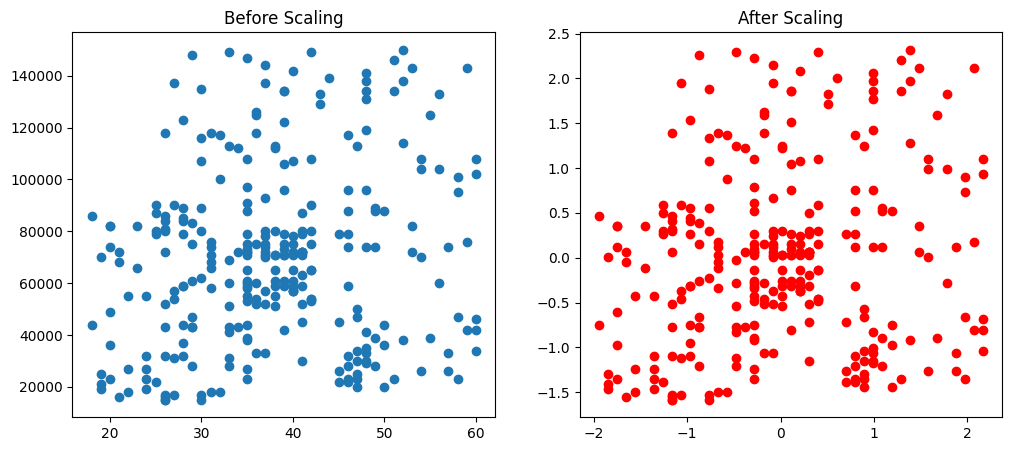

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X_train["Age"], X_train["EstimatedSalary"])
axes[0].set_title("Before Scaling")

axes[1].scatter(x_train_trans["Age"], x_train_trans["EstimatedSalary"],color = "red")
axes[1].set_title("After Scaling")

plt.show()

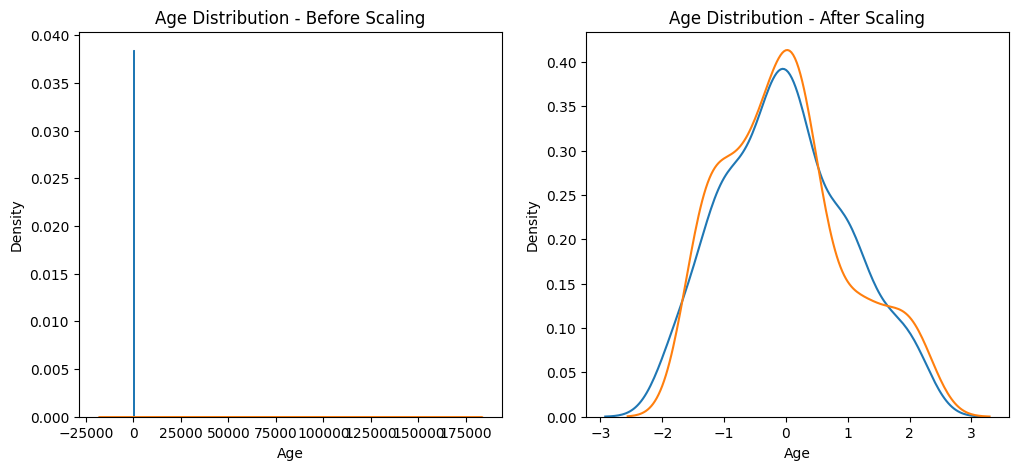

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: KDE before scaling
sns.kdeplot(data=X_train, x="Age", fill=True, ax=axes[0])
sns.kdeplot(data=X_train, x="EstimatedSalary", fill=True, ax=axes[0])
axes[0].set_title("Age Distribution - Before Scaling")

# Right: KDE after scaling
sns.kdeplot(data=x_train_trans, x="Age", ax=axes[1])
sns.kdeplot(data=x_train_trans, x="EstimatedSalary", ax=axes[1])
axes[1].set_title("Age Distribution - After Scaling")

plt.show()

### Note: After scaling, the shape of the data distribution remains the same. Scaling only changes the scale (mean and variance) but does not affect the overall pattern of the data.

# Why Scaling is Important?

In [25]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ---------------- Without Scaling ----------------
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(x_test)

# ---------------- With Scaling ---------------
lr_scaled = LogisticRegression()
lr_scaled.fit(x_train_trans, Y_train)
y_pred_scaled = lr_scaled.predict(x_test_trans)

# ---------------- Compare Accuracy ----------------
print("Actual :", accuracy_score(y_test, y_pred))
print("Scaled :", accuracy_score(y_test, y_pred_scaled))


Actual : 0.875
Scaled : 0.8666666666666667


### Note: Decision Tree Algo Impact

### For algorithms like Logistic Regression, SVM, KNN, and PCA, scaling is very important because they depend on distances, gradients, or variance.

### But for tree-based models (Decision Tree, Random Forest, XGBoost), scaling does not make much difference.
### This is because trees split data based on thresholds of feature values (e.g., "Age < 30"), and these thresholds are unaffected by whether the feature is scaled or not.

### Note: For Outliers In Feature scaling
### Scaling doesn’t remove outliers. After scaling, they remain outliers — still far from the rest of the data.

<img src="Screenshot 2025-09-13 223756.png" width="1000">

## Where to not use feature scaling:
## 1) Decision Trees
## 2) Random Forest
## 3) XG Boost